## Policy Iteration using KotlinRL Maze Env

In [1]:
USE {
    repositories {
        mavenCentral()
        maven("https://central.sonatype.com/repository/maven-snapshots/")
    }
    dependencies {
        implementation("io.github.kotlinrl:envs:0.1.0-SNAPSHOT")
        implementation("io.github.kotlinrl:integration:0.1.0-SNAPSHOT")
        implementation("io.github.kotlinrl:tabular:0.1.0-SNAPSHOT")
        implementation("io.github.kotlinrl:rendering:0.1.0-SNAPSHOT")
    }
}


In [2]:
import io.github.kotlinrl.core.*
import io.github.kotlinrl.envs.*
import io.github.kotlinrl.rendering.*
import io.github.kotlinrl.tabular.*


Let's set up our testing parameters.  There is no training with value iteration.  The ```Policy Iteration Algorithm``` works against a Model Based Environment to calculate the best ```Policy``` for the agent.

In [3]:
val testEpisodes = 3

In [4]:
val env = Maze(render = true)
val recordEnv = RecordVideo(env, folder = "./videos/maze_policy_iteration")

In [5]:
val planner = policyIteration()
val (policy, vTable) = planner.plan(env.asMDP(0.9))

println("Testing agent:")
val trainer = episodicTrainer(
    agent = policyAgent(policy = policy.pi()),
    env = recordEnv,
    successfulTermination = { it.reward == 0.0 },
    closeOnSuccess = true,
)

val testResults = trainer.train(maxEpisodes(testEpisodes))
println("Test average reward: ${testResults.totalAverageReward}")
displayVideos(recordEnv.folder)


Testing agent:
Max episodes reached: 3
Test average reward: -10.0


In [6]:
plotPolicyStateValueGrid(policy, vTable, 5, 5, mapOf(0 to "↑", 1 to "→", 2 to "↓", 3 to "←"))

<head>
 <meta charset="UTF-8">
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.5.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="EnhVrz"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 
 (function() {
 // ----------
 
 var plotSpec={
"layout":{
"name":"grid",
"ncol":2,
"nrow":1,
"fit":true,
"align":false
},
"figures":[{
"ggtitle":{
"text":"State Value Function"
},
"mapping":{
},
"data":{
"x":[0.0,1.0,2.0,3.0,4.0,0.0,1.0,2.0,3.0,4.0,0.0,1.0,2.0,3.0,4.0,0.0,1.0,2.0,3.0,4.0,0.0,1.0,2.0,3.0,4.0],
"y":[0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,-2.0,-2.0,-3.0,-3.0,-3.0,-3.0,-3.0,-4.0,-4.0,-4.0,-4.0,-4.0],
"label":["-6.51","-6.86","-7.18","-7.46","-7.71","-6.13","-7.18","-8.33","-7.71","-7.94","-5.7","-7.46","-8.15","-7.94","-8.15","-5.22","-7.71","-2.71","-1.9","-1.0","-4.69","-4.1","-3.44","-1.0","0.0"],
"value":[-6.51,-6.86,-7.18,-7.46,-7.71,-6.13,-7.18,-8.33,-7.71,-7.94,-5.7,-7.46,-8.15,-7.94,-8.15,-5.22,-7.71,-2.71,-1.9,-1.0,-4.69,-4.1,-3.44,-1.0,0.0]
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
},{
"aesthetic":"fill",
"scale_mapper_kind":"color_gradient",
"high":"#ffffff",
"low":"#5470c6",
"limits":[null,null]
},{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
},{
"aesthetic":"x",
"name":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"name":"y",
"limits":[null,null]
}],
"layers":[{
"mapping":{
"x":"x",
"y":"y",
"fill":"value"
},
"stat":"identity",
"size":0.5,
"color":"#000000",
"sampling":"none",
"inherit_aes":false,
"position":"identity",
"geom":"tile",
"data":{
}
},{
"mapping":{
"x":"x",
"y":"y",
"label":"label"
},
"stat":"identity",
"size":6.0,
"color":"#000000",
"sampling":"none",
"inherit_aes":false,
"position":"identity",
"geom":"text",
"data":{
}
}],
"data_meta":{
"series_annotations":[{
"type":"int",
"column":"x"
},{
"type":"int",
"column":"y"
},{
"type":"float",
"column":"value"
},{
"type":"str",
"column":"label"
}]
},
"spec_id":"3"
},{
"ggtitle":{
"text":"Policy"
},
"mapping":{
},
"data":{
"x":[0.0,1.0,2.0,3.0,4.0,0.0,1.0,2.0,3.0,4.0,0.0,1.0,2.0,3.0,4.0,0.0,1.0,2.0,3.0,4.0,0.0,1.0,2.0,3.0,4.0],
"y":[0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,-2.0,-2.0,-3.0,-3.0,-3.0,-3.0,-3.0,-4.0,-4.0,-4.0,-4.0,-4.0],
"label":["↓","←","←","←","←","↓","↑","↓","↑","↑","↓","↑","→","↑","↑","↓","↑","→","→","↓","→","→","↑","→","↑"],
"value":[-6.51,-6.86,-7.18,-7.46,-7.71,-6.13,-7.18,-8.33,-7.71,-7.94,-5.7,-7.46,-8.15,-7.94,-8.15,-5.22,-7.71,-2.71,-1.9,-1.0,-4.69,-4.1,-3.44,-1.0,0.0]
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
},{
"aesthetic":"fill",
"scale_mapper_kind":"color_gradient",
"high":"#ffffff",
"low":"#5470c6",
"limits":[null,null]
},{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
},{
"aesthetic":"x",
"name":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"name":"y",
"limits":[null,null]
}],
"layers":[{
"mapping":{
"x":"x",
"y":"y",
"fill":"value"
},
"stat":"identity",
"size":0.5,
"color":"#000000",
"sampling":"none",
"inherit_aes":false,
"position":"identity",
"geom":"tile",
"data":{
}
},{
"mapping":{
"x":"x",
"y":"y",
"label":"label"
},
"stat":"identity",
"size":18.0,
"color":"#000000",
"sampling":"none",
"inherit_aes":false,
"position":"identity",
"geom":"text",
"data":{
}
}],
"data_meta":{
"series_annotations":[{
"type":"int",
"column":"x"
},{
"type":"int",
"column":"y"
},{
"type":"float",
"column":"value"
},{
"type":"str",
"column":"label"
}]
},
"spec_id":"4"
}],
"kind":"subplots"
};
 var containerDiv = document.getElementById("EnhVrz");
 
 var toolbar = null;
 var plotContainer = containerDiv; 
 
 var options = {
 sizing: {
 width_mode: "fixed",
 height_mode: "fixed",
 width: 600.0,
 height: 400.0
 }
 };
 var fig = Le

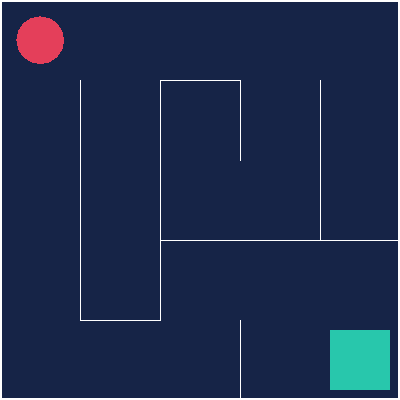

In [7]:
import java.io.File
import javax.imageio.ImageIO
import java.awt.image.BufferedImage

val pngFile = File(recordEnv.folder).listFiles()?.sorted()?.first()?.listFiles()?.sorted()?.first()

val image: BufferedImage = ImageIO.read(pngFile)
image